<h1><center> AdaBoost : </center></h1>

## Import Libraries :

In [26]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Première partie :

> Dans cette étape nous allons entraîner notre modèle avec un dataset non équilibré (avant l'application du SMOTE sur les données d'entraînement)

In [15]:
train_data = pd.read_csv('train.csv',sep=',')
test_data = pd.read_csv('test.csv',sep=',')

In [17]:
test_data.drop(columns='Unnamed: 0',inplace=True)
train_data.drop(columns='Unnamed: 0',inplace=True)

In [29]:
X_train=train_data.drop('outcome',axis=1)
y_train=train_data['outcome']

In [30]:
X_test=test_data.drop('outcome',axis=1)
y_test=test_data['outcome']

In [31]:
# Initialisation du classificateur AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Entraînement du modèle AdaBoost
ada_boost.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ada_boost.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle AdaBoost : {accuracy:.2f}")

Précision du modèle AdaBoost : 0.96


### Evaluation du modèle

Matrice de confusion:
[[379   4]
 [ 12   8]]


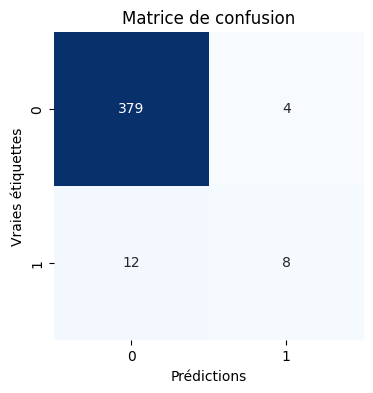

 Précision : 0.67, F1-score : 0.50, Rappel : 0.40
Balanced Accuracy : 0.69, AUC-ROC : 0.69


In [44]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Précision
precision = precision_score(y_test, y_pred)

# Rappel (Sensibilité)
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)
print(f" Précision : {precision:.2f}, F1-score : {f1:.2f}, Rappel : {recall:.2f}")
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy : {balanced_acc:.2f}, AUC-ROC : {roc_auc:.2f}")

## Deuxième partie :

> Dans cette étape nous allons entraîner notre modèle avec un dataset équilibré (après l'application du SMOTE sur les données d'entraînement)

In [34]:
data_train_balanced=  pd.read_csv('train_smote.csv',sep=',')

In [36]:
data_train_balanced.drop(columns='Unnamed: 0',inplace=True)

In [37]:
X_train_balanced=data_train_balanced.drop('outcome',axis=1)
y_train_balanced=data_train_balanced['outcome']

In [40]:
# Initialisation du classificateur AdaBoost
ada_boost_balanced = AdaBoostClassifier(n_estimators=50, random_state=42)
# Entraînement du modèle AdaBoost
ada_boost_balanced.fit(X_train_balanced, y_train_balanced)

# Prédiction sur l'ensemble de test
y_pred_balanced = ada_boost_balanced.predict(X_test)
# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"Précision du modèle AdaBoost : {accuracy:.2f}")

Précision du modèle AdaBoost : 0.92


### Evaluation du modèle

Matrice de confusion:
[[360  23]
 [  9  11]]


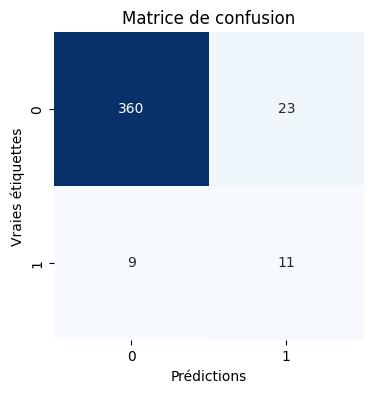

 Précision : 0.32, F1-score : 0.41, Rappel : 0.55
Balanced Accuracy : 0.74, AUC-ROC : 0.74


In [45]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
print("Matrice de confusion:")
print(conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Précision
precision = precision_score(y_test, y_pred_balanced)

# Rappel (Sensibilité)
recall = recall_score(y_test, y_pred_balanced)

# F1-score
f1 = f1_score(y_test,y_pred_balanced)
print(f" Précision : {precision:.2f}, F1-score : {f1:.2f}, Rappel : {recall:.2f}")

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_balanced)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_balanced)
print(f"Balanced Accuracy : {balanced_acc:.2f}, AUC-ROC : {roc_auc:.2f}")